In [69]:
import cv2,os
import pandas as pd
import numpy as np
from numpy import asarray
from matplotlib import pyplot as plt
import keras
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras import Input,Model
from keras.models import Sequential
from keras.layers import Dense,Activation,Conv2D,Conv2DTranspose,MaxPooling2D,Concatenate,Dropout
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

# Task 3 Ensembling

In [70]:
# reading data
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vS0z24-f7V8e-k40fK7uE8RHE8RPv7B3_eUkYKl9lksUhwNVqyz7Jb4nwap1poNAL-zd68RkRIBp1bd/pub?gid=468671031&single=true&output=csv')
df.head(5)

,tcp_packets,dist_port_tcp,external_ips,vulume_bytes,udp_packets,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,source_app_packets.1,dns_query_times,type
0,36,6,3,3911,0,39,33,5100,4140,39,3,benign
1,117,0,9,23514,0,128,107,26248,24358,128,11,benign
2,196,0,6,24151,0,205,214,163887,24867,205,9,benign
3,6,0,1,889,0,7,6,819,975,7,1,benign
4,6,0,1,882,0,7,6,819,968,7,1,benign


In [71]:
# seprating target and trainable column 
X=df.drop('type',axis=1).values
Y=df[['type']]

In [72]:
# encodeing target column
le = preprocessing.LabelEncoder()
le.fit(['benign','malicious'])
Y = le.transform(Y)

C:\Users\Huawei\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [73]:
#splitting data into tge size of 80% and 20%
X_Test,X_Train,Y_Test,Y_Train = train_test_split(X,Y,test_size=0.2)

In [74]:
# initilaizing algorithm with Max depth is 15
DTC = DecisionTreeClassifier(max_depth=15)
RFC = RandomForestClassifier(max_depth=15)
BC = BaggingClassifier(base_estimator=DTC)
ADB = AdaBoostClassifier(base_estimator=DTC)

In [97]:
RFC_TScore = []
BC_TScore = []
ADA_TScore = []

In [76]:
# Grid searchcv with given parameters
params = {
    "n_estimators":[10,20,100],
    'max_features':["auto", "sqrt", "log2"],
    "min_impurity_decrease":[0,0.5,1.0]
}
GSC =GridSearchCV(estimator=RFC,param_grid=params,cv=5)

In [77]:
# Training and obtaining score
GSC.fit(X_Train,Y_Train)
GSC_RF_Score = GSC.score(X_Test,Y_Test)
print(GSC_RF_Score)
print(GSC.best_params_)
print(GSC.best_score_)

0.8530911408540471
{'max_features': 'auto', 'min_impurity_decrease': 0, 'n_estimators': 100}
0.8572414073787671


In [78]:

params1 = {
    "n_estimators":[10,20,100],
    'base_estimator__max_features':["auto", "sqrt", "log2"],
    "base_estimator__min_impurity_decrease":[0,0.5,1.0]
}
GSC1 =GridSearchCV(estimator=BC,param_grid=params1,cv=5)
GSC1.fit(X_Train,Y_Train)
GSC_BC_Score =GSC1.score(X_Test,Y_Test)
print(GSC_BC_Score)
print(GSC1.best_params_)
print(GSC1.best_score_)

0.8561185468451242
{'base_estimator__max_features': 'sqrt', 'base_estimator__min_impurity_decrease': 0, 'n_estimators': 100}
0.8559634521072017


In [79]:
params1 = {
    "n_estimators":[10,20,100],
    'base_estimator__max_features':["auto", "sqrt", "log2"],
    "base_estimator__min_impurity_decrease":[0,0.5,1.0]
}
GSC1 =GridSearchCV(estimator=ADB,param_grid=params1,cv=5)
GSC1.fit(X_Train,Y_Train)
GSC_ADB_Score =GSC1.score(X_Test,Y_Test)
print(GSC_ADB_Score)
print(GSC1.best_params_)
print(GSC1.best_score_)

0.8612173358827279
{'base_estimator__max_features': 'auto', 'base_estimator__min_impurity_decrease': 0, 'n_estimators': 100}
0.867436560102562


Random Forest classifier comes forward as a best performing algorith at maxdepth of 15. As the maxdepth refers to that how much our tree should grow, 

In [98]:
# initilaizing algorithm with Max depth is 5
DTC = DecisionTreeClassifier(max_depth=5)
RFC=RandomForestClassifier(max_depth=5)
BC = BaggingClassifier(base_estimator=DTC)
ADB = AdaBoostClassifier(base_estimator=DTC)

In [99]:
from sklearn.metrics import accuracy_score

params = {
    "n_estimators" : 100,
    'max_features' : "auto",
    "min_impurity_decrease" : 0
}

RFC.set_params(**params)
RFC.fit(X_Train, Y_Train)
GSC_RF_Score = accuracy_score(Y_Test, RFC.predict(X_Test))
RFC_TScore.append(GSC_RF_Score)
print(f"Random Forest Accuracy: {accuracy_score(Y_Test, RFC.predict(X_Test))}")

params1 = {
    "n_estimators" : 100 ,
    'base_estimator__max_features' : "sqrt",
    "base_estimator__min_impurity_decrease": 0
}

BC.set_params(**params1)
BC.fit(X_Train, Y_Train)
GSC_BC_Score = accuracy_score(Y_Test, BC.predict(X_Test))
BC_TScore.append(GSC_BC_Score)
print(f"Bagging Accuracy: {accuracy_score(Y_Test, BC.predict(X_Test))}")

params1 = {
    "n_estimators": 100,
    'base_estimator__max_features' : "auto",
    "base_estimator__min_impurity_decrease" : 0
}

ADB.set_params(**params1)
ADB.fit(X_Train, Y_Train)
GSC_ADB_Score = accuracy_score(Y_Test, ADB.predict(X_Test))
ADA_TScore.append(GSC_ADB_Score)
print(f"AdaBoost Accuracy: {accuracy_score(Y_Test, ADB.predict(X_Test))}")

Random Forest Accuracy: 0.7691204588910134
Bagging Accuracy: 0.7641810070108349
AdaBoost Accuracy: 0.8465583173996176


In [100]:
# initilaizing algorithm with Max depth is 10
DTC = DecisionTreeClassifier(max_depth=10)
RFC=RandomForestClassifier(max_depth=10)
BC = BaggingClassifier(base_estimator=DTC)
ADB = AdaBoostClassifier(base_estimator=DTC)

In [101]:
params = {
    "n_estimators" : 100,
    'max_features' : "auto",
    "min_impurity_decrease" : 0
}

RFC.set_params(**params)
RFC.fit(X_Train, Y_Train)
GSC_RF_Score = accuracy_score(Y_Test, RFC.predict(X_Test))
RFC_TScore.append(GSC_RF_Score)
print(f"Random Forest Accuracy: {accuracy_score(Y_Test, RFC.predict(X_Test))}")

params1 = {
    "n_estimators" : 100 ,
    'base_estimator__max_features' : "sqrt",
    "base_estimator__min_impurity_decrease": 0
}

BC.set_params(**params1)
BC.fit(X_Train, Y_Train)
GSC_BC_Score = accuracy_score(Y_Test, BC.predict(X_Test))
BC_TScore.append(GSC_BC_Score)
print(f"Bagging Accuracy: {accuracy_score(Y_Test, BC.predict(X_Test))}")

params1 = {
    "n_estimators": 100,
    'base_estimator__max_features' : "auto",
    "base_estimator__min_impurity_decrease" : 0
}

ADB.set_params(**params1)
ADB.fit(X_Train, Y_Train)
GSC_ADB_Score = accuracy_score(Y_Test, ADB.predict(X_Test))
ADA_TScore.append(GSC_ADB_Score)
print(f"AdaBoost Accuracy: {accuracy_score(Y_Test, ADB.predict(X_Test))}")

Random Forest Accuracy: 0.841459528362014
Bagging Accuracy: 0.8406628425748884
AdaBoost Accuracy: 0.8550031867431485


In [102]:
# initilaizing algorithm with Max depth is 15
DTC = DecisionTreeClassifier(max_depth=15)
RFC=RandomForestClassifier(max_depth=15)
BC = BaggingClassifier(base_estimator=DTC)
ADB = AdaBoostClassifier(base_estimator=DTC)

In [103]:
params = {
    "n_estimators" : 100,
    'max_features' : "auto",
    "min_impurity_decrease" : 0
}

RFC.set_params(**params)
RFC.fit(X_Train, Y_Train)
GSC_RF_Score = accuracy_score(Y_Test, RFC.predict(X_Test))
RFC_TScore.append(GSC_RF_Score)
print(f"Random Forest Accuracy: {accuracy_score(Y_Test, RFC.predict(X_Test))}")

params1 = {
    "n_estimators" : 100 ,
    'base_estimator__max_features' : "sqrt",
    "base_estimator__min_impurity_decrease": 0
}

BC.set_params(**params1)
BC.fit(X_Train, Y_Train)
GSC_BC_Score = accuracy_score(Y_Test, BC.predict(X_Test))
BC_TScore.append(GSC_BC_Score)
print(f"Bagging Accuracy: {accuracy_score(Y_Test, BC.predict(X_Test))}")

params1 = {
    "n_estimators": 100,
    'base_estimator__max_features' : "auto",
    "base_estimator__min_impurity_decrease" : 0
}

ADB.set_params(**params1)
ADB.fit(X_Train, Y_Train)
GSC_ADB_Score = accuracy_score(Y_Test, ADB.predict(X_Test))
ADA_TScore.append(GSC_ADB_Score)
print(f"AdaBoost Accuracy: {accuracy_score(Y_Test, ADB.predict(X_Test))}")

Random Forest Accuracy: 0.8497450605481198
Bagging Accuracy: 0.8548438495857233
AdaBoost Accuracy: 0.8535691523263225


In [104]:
# initilaizing algorithm with Max depth is 20
DTC = DecisionTreeClassifier(max_depth=20)
RFC=RandomForestClassifier(max_depth=20)
BC = BaggingClassifier(base_estimator=DTC)
ADB = AdaBoostClassifier(base_estimator=DTC)

In [105]:
params = {
    "n_estimators" : 100,
    'max_features' : "auto",
    "min_impurity_decrease" : 0
}

RFC.set_params(**params)
RFC.fit(X_Train, Y_Train)
GSC_RF_Score = accuracy_score(Y_Test, RFC.predict(X_Test))
RFC_TScore.append(GSC_RF_Score)
print(f"Random Forest Accuracy: {accuracy_score(Y_Test, RFC.predict(X_Test))}")

params1 = {
    "n_estimators" : 100 ,
    'base_estimator__max_features' : "sqrt",
    "base_estimator__min_impurity_decrease": 0
}

BC.set_params(**params1)
BC.fit(X_Train, Y_Train)
GSC_BC_Score = accuracy_score(Y_Test, BC.predict(X_Test))
BC_TScore.append(GSC_BC_Score)
print(f"Bagging Accuracy: {accuracy_score(Y_Test, BC.predict(X_Test))}")

params1 = {
    "n_estimators": 100,
    'base_estimator__max_features' : "auto",
    "base_estimator__min_impurity_decrease" : 0
}

ADB.set_params(**params1)
ADB.fit(X_Train, Y_Train)
GSC_ADB_Score = accuracy_score(Y_Test, ADB.predict(X_Test))
ADA_TScore.append(GSC_ADB_Score)
print(f"AdaBoost Accuracy: {accuracy_score(Y_Test, ADB.predict(X_Test))}")

Random Forest Accuracy: 0.8537284894837476
Bagging Accuracy: 0.8527724665391969
AdaBoost Accuracy: 0.8223390694710007


In [106]:
# initilaizing algorithm with Max depth is 25
DTC = DecisionTreeClassifier(max_depth=25)
RFC=RandomForestClassifier(max_depth=25)
BC = BaggingClassifier(base_estimator=DTC)
ADB = AdaBoostClassifier(base_estimator=DTC)

In [107]:
params = {
    "n_estimators" : 100,
    'max_features' : "auto",
    "min_impurity_decrease" : 0
}

RFC.set_params(**params)
RFC.fit(X_Train, Y_Train)
GSC_RF_Score = accuracy_score(Y_Test, RFC.predict(X_Test))
RFC_TScore.append(GSC_RF_Score)
print(f"Random Forest Accuracy: {accuracy_score(Y_Test, RFC.predict(X_Test))}")

params1 = {
    "n_estimators" : 100 ,
    'base_estimator__max_features' : "sqrt",
    "base_estimator__min_impurity_decrease": 0
}

BC.set_params(**params1)
BC.fit(X_Train, Y_Train)
GSC_BC_Score = accuracy_score(Y_Test, BC.predict(X_Test))
BC_TScore.append(GSC_BC_Score)
print(f"Bagging Accuracy: {accuracy_score(Y_Test, BC.predict(X_Test))}")

params1 = {
    "n_estimators": 100,
    'base_estimator__max_features' : "auto",
    "base_estimator__min_impurity_decrease" : 0
}

ADB.set_params(**params1)
ADB.fit(X_Train, Y_Train)
GSC_ADB_Score = accuracy_score(Y_Test, ADB.predict(X_Test))
ADA_TScore.append(GSC_ADB_Score)
print(f"AdaBoost Accuracy: {accuracy_score(Y_Test, ADB.predict(X_Test))}")

Random Forest Accuracy: 0.8540471637985978
Bagging Accuracy: 0.8518164435946463
AdaBoost Accuracy: 0.8597833014659019


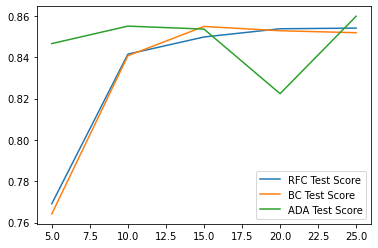

In [108]:
# Plotting Test score on each best depth
x = [5,10,15,20,25]
plt.plot(x, RFC_TScore, label = "RFC Test Score")
plt.plot(x, BC_TScore, label = "BC Test Score")
plt.plot(x, ADA_TScore, label = "ADA Test Score")
plt.legend()
plt.show()

# Task 4 CNN

In [111]:
#  Seting path for images
path = "C:/Users/Huawei/Desktop/A2/images"
images = os.listdir(path)
#images.remove("Thumbs.db")

In [113]:
#  Seting path for labels
path1 = "C:/Users/Huawei/Desktop/A2/labels"
labels = os.listdir(path1)
# labels.remove("image_labels.txt")
labels.pop()

'image_labels.txt'

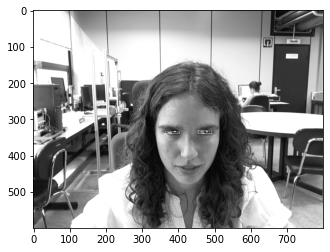

In [116]:
# reading images and labels and visualizing image with given labels
for f in labels:
  file_path = os.path.join(path1,f)
  a=open(file_path,mode='r')
  lines=a.readline()
  for line in a:
    parts=line.split()
    image_name=parts[0]
    image_path="C:/Users/Huawei/Desktop/A2/images/" + image_name
    image=cv2.imread(image_path)
    image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    le_ex1=int(float(parts[1]))
    le_ey1=int(float(parts[2]))
    le_ix2=int(float(parts[3]))
    le_iy2=int(float(parts[4]))
    le_inx3=int(float(parts[5]))
    le_iny3=int(float(parts[6]))
    re_ex1=int(float(parts[7]))
    re_ey1=int(float(parts[8]))
    re_ix2=int(float(parts[9]))
    re_iy2=int(float(parts[10]))
    re_inx3=int(float(parts[11]))
    re_iny3=int(float(parts[12]))
    img_le=cv2.rectangle(image_gray, (le_ex1, le_ey1), (le_inx3, le_iny3), (255,0,0), 1)
    img_re=cv2.rectangle(img_le, (re_ex1, re_ey1), (re_inx3, re_iny3), (255,0,0), 1)
    
    image_ir = cv2.circle(img_re, (le_ix2,le_iy2), radius=2, color=(255, 255, 0), thickness=-3)
    image_ir2 = cv2.circle(image_ir, (re_ix2,re_iy2), radius=2, color=(255, 0, 0), thickness=-300)
    plt.imshow(image_ir2, cmap = 'gray')
    break
  break



In [117]:
# reading image and croping them with given labels and save images in a new folder 
X = []
Y = []
for f in labels:
  file_path = os.path.join(path1,f)
  a=open(file_path,mode='r')
  lines=a.readline()
  for line in a:
    parts=line.split()
    image_name=parts[0]
    image_path="C:/Users/Huawei/Desktop/A2/images/" + image_name
    image=cv2.imread(image_path)
    image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    le_ex1=int(float(parts[1]))
    le_ey1=int(float(parts[2]))
    le_ix2=int(float(parts[3]))
    le_iy2=int(float(parts[4]))
    le_inx3=int(float(parts[5]))
    le_iny3=int(float(parts[6]))
    re_ex1=int(float(parts[7]))
    re_ey1=int(float(parts[8]))
    re_ix2=int(float(parts[9]))
    re_iy2=int(float(parts[10]))
    re_inx3=int(float(parts[11]))
    re_iny3=int(float(parts[12]))
    name=image_name.split('.')
    le_xcenter = round((le_ex1+le_inx3)/2)
    le_ycenter = round((le_ey1+le_iny3)/2)
    crpl = image_gray[le_ycenter-24:le_ycenter+24,le_xcenter-24:le_xcenter+24]
    X.append(crpl)
    cv2.imwrite("Cropped_data/"+name[0]+"_left.png", crpl)
    mask_L = np.zeros(crpl.shape[:2], dtype="uint8")
    Lx_iris =  round(le_ix2-le_xcenter+24)
    Ly_iris =  round(le_iy2 - le_ycenter+24)
    Left_iris= (Lx_iris,Ly_iris)
    image_ir = cv2.circle(mask_L, (Left_iris), radius=2, color=(255, 255, 0), thickness=-3)
    Y.append(image_ir)
    re_xcenter = round((re_ex1+re_inx3)/2)
    re_ycenter = round((re_ey1+re_iny3)/2)
    crpr = image_gray[re_ycenter-24:re_ycenter+24,re_xcenter-24:re_xcenter+24]
    X.append(crpr)
    mask_R = np.zeros(crpr.shape[:2], dtype="uint8")
    cv2.imwrite("Cropped_data/"+name[0]+"_left.png", crpr)
    Rx_iris =  round(re_ix2-re_xcenter+24)
    Ry_iris =  round(re_iy2 - re_ycenter+24)
    Right_iris = (Rx_iris,Ry_iris)
    image_ir = cv2.circle(mask_R, (Right_iris), radius=2, color=(255, 255, 0), thickness=-3)
    Y.append(image_ir)  
  #   break
  # break 

In [119]:
# setting shape of image according to model
x = np.array(X).reshape(-1,48,48,1)
print(x.shape)
y = np.array(Y).reshape(-1,48,48,1)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.2)

(2266, 48, 48, 1)
(2266, 48, 48, 1)


In [120]:
#checking weather gpu is available or not
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
best_accuracy = 1

for activation in ['tanh', 'relu', 'sigmoid']:
    for loss in ['mse', 'mae']:
        for optimizer in ['sgd', 'adam', 'adamax', 'rmsprop']:
            input = Input(shape = (48, 48, 1))
            a = Conv2D(64, (3, 3), activation="sigmoid", padding='same')(input)
            b = Conv2D(64, (3, 3), activation="sigmoid", padding='same')(a)

            c = MaxPooling2D(pool_size=(2, 2), padding='valid')(b)
            d = Conv2D(128, (3, 3), activation="sigmoid", padding='same')(c)

            e = MaxPooling2D(pool_size=(2, 2), padding='valid')(d)
            f = Conv2D(256, (3, 3), activation="sigmoid", padding='same')(e)

            g = Conv2DTranspose(64, (3, 3), strides=(4, 4),  activation="sigmoid", padding='same')(f)
            h = Conv2D(64, (3, 3), activation="sigmoid", padding='same')(g)

            i = Concatenate()([b, h])

            j = Conv2D(64, (3, 3), activation="sigmoid", padding='same')(i)
            output0 =  Conv2D(1, (3, 3), activation='linear', padding='same')(j)

            k = Conv2D(256, (3, 3), activation="sigmoid", padding='same')(f)
            l = Conv2D(256, (3, 3), activation="sigmoid", padding='same')(k)

            m = Conv2DTranspose(128, (3, 3), strides=(2, 2),  activation='relu', padding='same')(l)
            n = Conv2D(128, (3, 3), activation="sigmoid", padding='same')(m)

            o = Conv2DTranspose(64, (3, 3), strides=(2, 2),  activation='relu', padding='same')(n)
            p = Conv2D(64, (3, 3), activation="sigmoid", padding='same')(o)

            output1 = Conv2D(1, (3, 3), activation='linear', padding='same')(p)

            model = Model(inputs=input, outputs=[output0, output1], )
            model.compile(loss = loss, optimizer = optimizer, metrics = ['accuracy'])
            model.fit(x = X_train, y = y_train, epochs = 15, verbose = 0)

            evaluation = model.evaluate(X_test, y_test)
            if (evaluation[-2] > best_accuracy):
                best_accuracy = evaluation[-2]
                best_model = model
                best_activation = activation
                best_loss = loss
                best_optimizer = optimizer

In [ ]:
best_model.compile(loss=best_loss, optimizer = best_optimizer, metrics = ['accuracy'])
model.fit(x = X_train, y = [y_train, X_train], epochs = 15)

<Figure size 432x288 with 0 Axes>

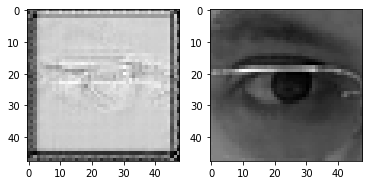

<Figure size 432x288 with 0 Axes>

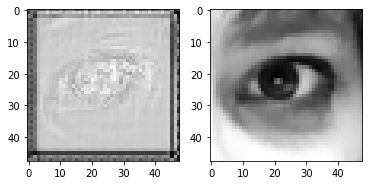

<Figure size 432x288 with 0 Axes>

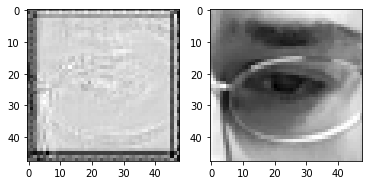

<Figure size 432x288 with 0 Axes>

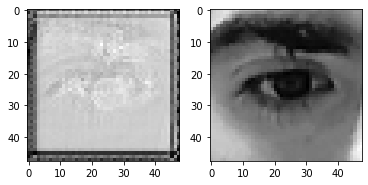

<Figure size 432x288 with 0 Axes>

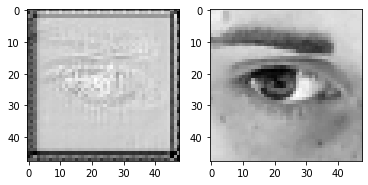

<Figure size 432x288 with 0 Axes>

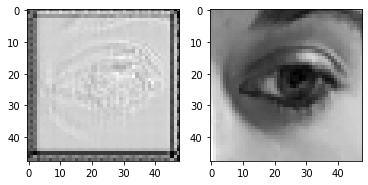

<Figure size 432x288 with 0 Axes>

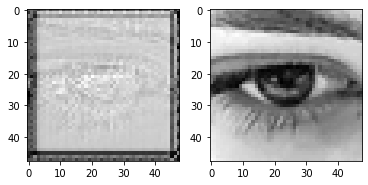

<Figure size 432x288 with 0 Axes>

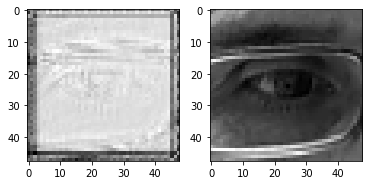

<Figure size 432x288 with 0 Axes>

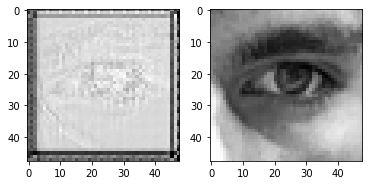

<Figure size 432x288 with 0 Axes>

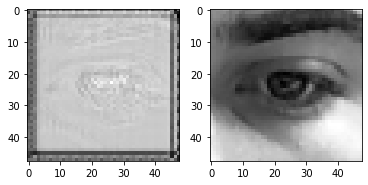

In [125]:
(predictions0, predictions1), test_images = model.predict(X_test[220 : 230]), X_test[220 : 230]

for i in range(10):
    plt.figure()
    a=predictions0[i]
    b=test_images[i]
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.imshow(a, cmap='gray')
    ax2.imshow(b, cmap='gray')